In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
#from radiomics.featureextractor import *
from sklearn import mixture

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
#from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [4]:
import SimpleITK as sitk  
mask_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
pet_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

#mask_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
#pet_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

mask = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.124.113532.10.149.172.5.20131107.93455.7725981_mask_pred_float.nii'

img = sitk.ReadImage(mask)
array = sitk.GetArrayFromImage(img).transpose()
array.shape

seuil = np.zeros((256, 256, 299))
x,y,z = np.where(array > 0.5)
for j  in range(len(x)) :
    seuil[x[j], y[j], z[j]] = array[x[j], y[j], z[j]]

mip_imshow(seuil, 0, cmap='viridis', type = 'mask')

mip_imshow(array, 0, cmap='viridis', type = 'mask')

In [5]:
model = WatershedModel(mask_path, pet_path, type = '4d')

In [6]:
ws_array, coordonate = model.watershed_model(0.41)

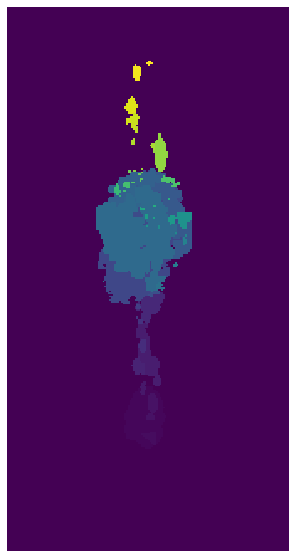

In [7]:
mip_imshow(ws_array, 0, cmap='viridis', type = 'mask')

In [8]:
coordonate

61

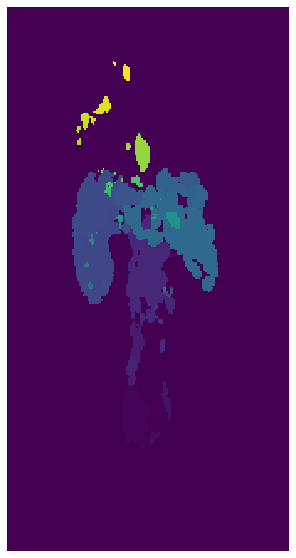

In [9]:
mip_imshow(ws_array, 90, cmap='viridis', type = 'mask')

In [11]:
model.rois_details(ws_array, 61)

{1: 270.8148037776849,
 2: 5.523785964594455,
 3: 9.15654610347189,
 4: 1.6422066381226759,
 5: 57.0791216341427,
 6: 11.04757192918891,
 7: 447.1778439445565,
 8: 3.9811070015095176,
 9: 0.9952767503773794,
 10: 0.09952767503773793,
 11: 0.34834686263208275,
 12: 0.04976383751886897,
 13: 700.2767215655241,
 14: 573.3291720548893,
 15: 2.5379557134623174,
 16: 71.46087067709584,
 17: 180.14509181830567,
 18: 5.8721328272265385,
 19: 113.76013256813445,
 20: 36.62618441388756,
 21: 913.5147653338777,
 22: 0.19905535007547587,
 23: 0.9455129128585104,
 24: 0.04976383751886897,
 25: 0.04976383751886897,
 26: 0.5474022127075586,
 27: 0.6966937252641655,
 28: 0.09952767503773793,
 29: 0.04976383751886897,
 30: 0.09952767503773793,
 31: 15.227734280773904,
 32: 0.04976383751886897,
 33: 1.9905535007547588,
 34: 0.39811070015095174,
 35: 0.04976383751886897,
 36: 0.19905535007547587,
 37: 0.04976383751886897,
 38: 0.09952767503773793,
 39: 0.04976383751886897,
 40: 0.04976383751886897,
 41: 

for i in range(1, 62) :
    new_mask = np.zeros((168,168,324))
    new_mask[np.where(ws_array == i)] = 1
    mip_imshow(new_mask, 0, cmap='viridis', type='mask')

In [6]:
#test 

In [12]:
from skimage import segmentation

binary_array = model.get_binary_threshold_mask_array(0.41)
binary_img = model.get_binary_threshold_mask_img(0.41)

labelled_img = model.get_labelled_threshold_mask_img(binary_img)
labelled_array = model.get_labelled_threshold_mask_array(labelled_img)

In [13]:
pet_array = model.pet_array

In [14]:
model.label_stat_results(labelled_img)['total_vol']

3494.9143089501713

In [15]:
from skimage.feature import peak_local_max

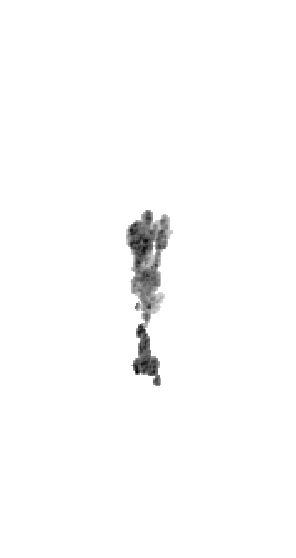

In [19]:
#label 5
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_array == 5)] = model.pet_array[np.where(labelled_array== 5)]
mip_imshow(new_mask_3D_5, 0, 'Greys', 'mask' )

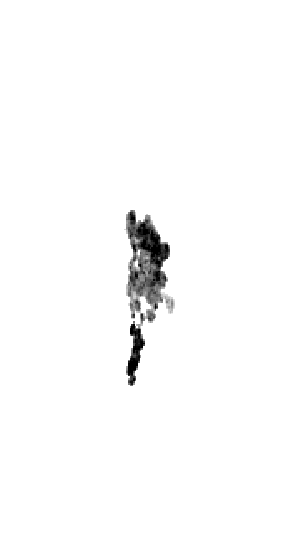

In [78]:
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_array == 5)] = model.pet_array[np.where(labelled_array== 5)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)
new = np.transpose(np.flip(new_mask_3D_5, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 25)

#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

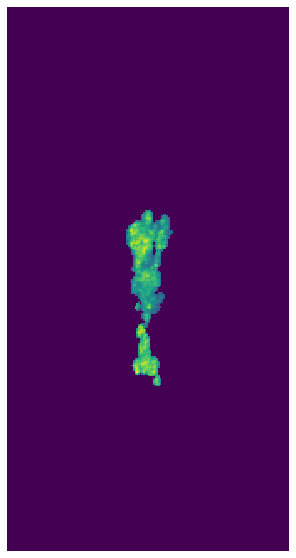

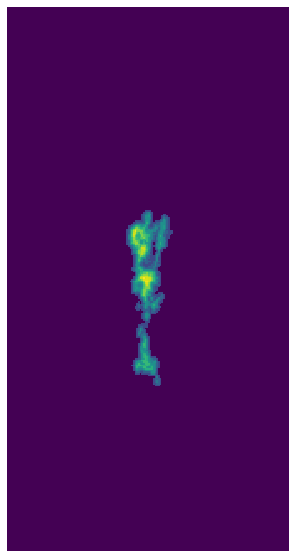

[[ 80  81 162]
 [ 86  76 190]
 [ 79  83 160]]


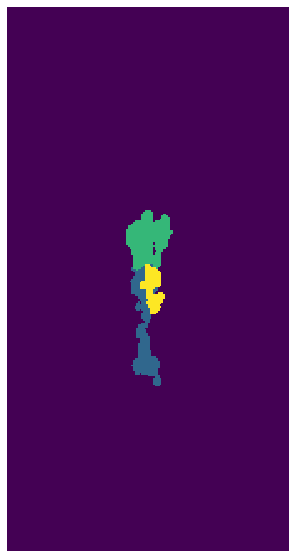

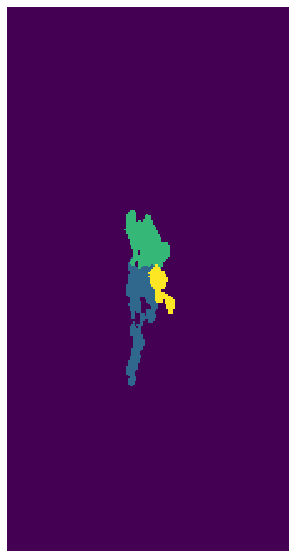

In [75]:
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_array == 5)] = model.pet_array[np.where(labelled_array== 5)]
mip_imshow(new_mask_3D_5, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_5)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True,  num_peaks= 3)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(localMax)

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [15]:
volume

7572.264572221183

In [ ]:
#label 11

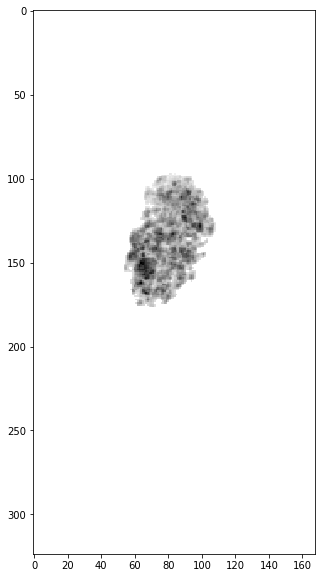

In [83]:
new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_array == 11)] = model.pet_array[np.where(labelled_array== 11)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)

new_11 = np.transpose(np.flip(new_mask_3D_11, axis = 2), (2,1,0)) #coronal

vol_angle = scipy.ndimage.interpolation.rotate(new_11, 0 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)

f = plt.figure(figsize=(10,10))
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 15)
#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

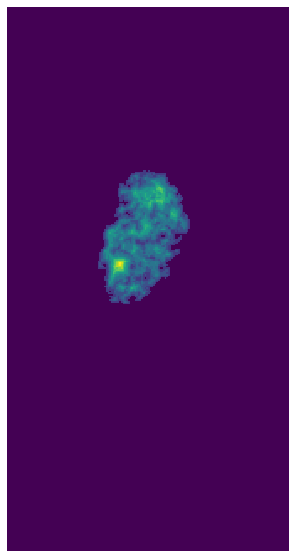

[[118  67 171]
 [112  66 168]
 [114  66 168]]


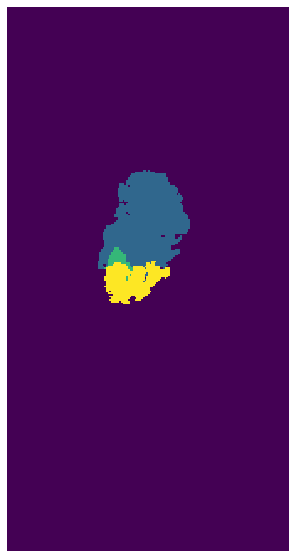

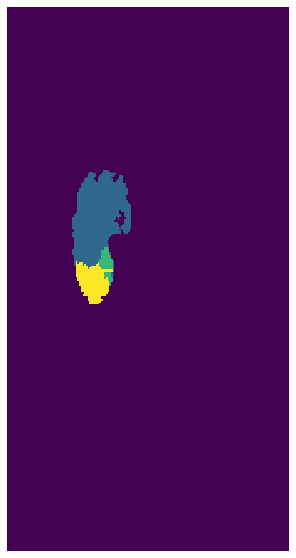

In [84]:
D = ndimage.distance_transform_edt(new_mask_3D_11)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True,  num_peaks= 3)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(localMax)

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [6]:
model = PostProcess_Reader(mask_path, pet_path, type = '4d')

for i in range(1,22) : 
    x,y,z = np.where(mask == i)
    new_mask_3D = np.zeros((169, 169, 255))
    for j in range(len(x)): 

        new_mask_3D[x[j], y[j], z[j]] = 10
    mip_imshow(new_mask_3D, 0)

In [4]:
import SimpleITK as sitk 

In [ ]:
#2 MOYENS POUR LABELLISE MASK BINAIRE

In [ ]:
#SCIKIT LEARN LABEL

In [7]:
model.number_of_label

15

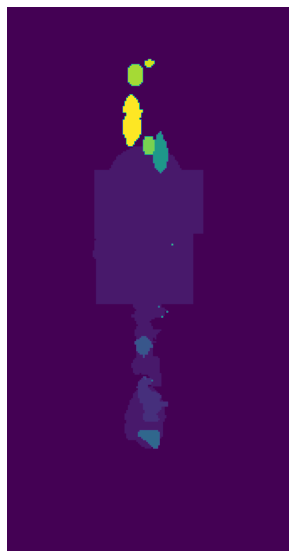

In [8]:
mip_imshow(model.labelled_mask, 0, 'viridis', 'mask')

In [ ]:
#SIMPLE ITK CONNECTED COMPONENT

In [9]:
labelled = sitk.ConnectedComponent(model.binary_mask_img)

In [10]:
stats = sitk.LabelIntensityStatisticsImageFilter()
stats.Execute(labelled, model.pet_img)

In [11]:
stats.GetLabels()

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)

In [12]:
for label in stats.GetLabels() : 
    print('label : {}, number_pixels : {}, centroid : {}'.format(label, stats.GetNumberOfPixels(label), stats.GetCentroid(label)))

label : 1, number_pixels : 198429, centroid : (34.92018185253306, -189.55100165168062, -921.4767624691956)
label : 2, number_pixels : 398, centroid : (-17.036884250353353, -172.6488218834652, -1282.429648241206)
label : 3, number_pixels : 954, centroid : (-49.04620687616699, -176.86296521392757, -1217.8616352201257)
label : 4, number_pixels : 1, centroid : (-32.959808349609375, -170.95010375976562, -1181.5)
label : 5, number_pixels : 3, centroid : (-53.32395935058594, -188.59903462727863, -1176.5)
label : 6, number_pixels : 327, centroid : (-37.842222534553, -192.4601274776167, -1119.7844036697247)
label : 7, number_pixels : 1, centroid : (19.986984252929688, -146.51312255859375, -1067.5)
label : 8, number_pixels : 1, centroid : (-4.4499969482421875, -134.2946319580078, -1058.5)
label : 9, number_pixels : 1, centroid : (-12.595657348632812, -154.65878295898438, -1049.5)
label : 10, number_pixels : 1, centroid : (24.059814453125, -122.07614135742188, -938.5)
label : 11, number_pixels : 

In [13]:
sitk.Image.TransformPhysicalPointToIndex(labelled, stats.GetCentroid(1 ))

(93, 81, 188)

In [14]:
array_1 = sitk.GetArrayFromImage(labelled).transpose()

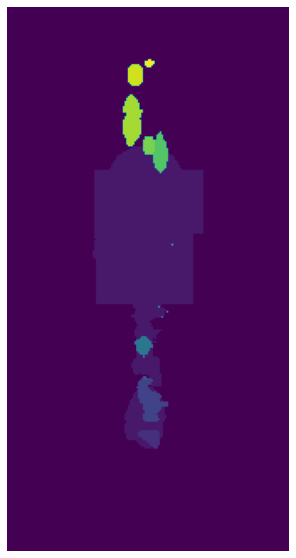

In [15]:
mip_imshow(array_1, 0, cmap = 'viridis', type='mask')

In [16]:
array_1.shape

(168, 168, 324)

for i in range(1,4) : 
    x,y,z = np.where(array_1 == i) 
    new_mask_3D = np.zeros((168, 168, 390)) 
    
    for j in range(len(x)):
        new_mask_3D[x[j], y[j], z[j]] = i

    mip_imshow(new_mask_3D, 0, cmap='Greys', type = 'mask')

In [ ]:
#MASK 4D IMSHOW ET MASK BINAIRE 3D IMSHOW 

In [17]:
mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask).transpose()
mask_array.shape

(168, 168, 324, 59)

for i in range(5):
    mip_imshow(mask_array[:,:,:,i], 0, cmap='Greys', type = 'mask')

mip_imshow_4D(mask_array, 0, cmap = 'Blues')

In [18]:
pet = sitk.ReadImage(pet_path)
pet_array = sitk.GetArrayFromImage(pet).transpose()
pet_array.shape

(168, 168, 324)

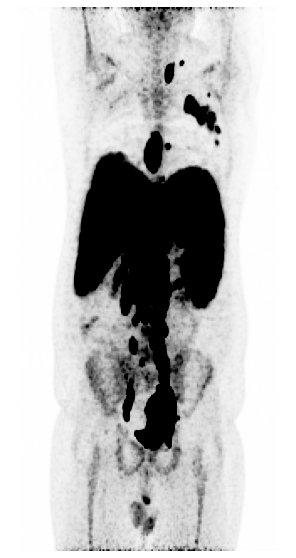

In [19]:
mip_imshow(pet_array, 270, 'Greys', 'tep')

In [20]:
#superposer TEP et MIP 
mask = sitk.ReadImage(mask_path)
mask_array = sitk.GetArrayFromImage(mask).transpose()
mask_array.shape

(168, 168, 324, 59)

In [21]:
#treshold mask 

for i in range(mask_array.shape[3]):
    x,y,z = np.where(mask_array[:,:,:,i] != 0)
    suv_values = []
    for j in range(len(x)):
        suv_values.append(pet_array[x[j], y[j], z[j]])

    maxi = np.max(suv_values)
    seuil = maxi * 0.41

    for a,b,c in zip(x,y,z) :
        if pet_array[a,b,c] <= seuil :
            mask_array[a,b,c,i] = 0

In [22]:
#reunite in 3D
shape_mask = mask_array.shape
binary_mask = np.zeros((shape_mask[0], shape_mask[1], shape_mask[2]))
sum_mask = np.ndarray.sum(mask_array, axis = -1)
binary_mask[np.where(sum_mask != 0)] = 1
binary_mask = binary_mask.astype(np.uint8)

In [23]:
binary_mask.shape

(168, 168, 324)

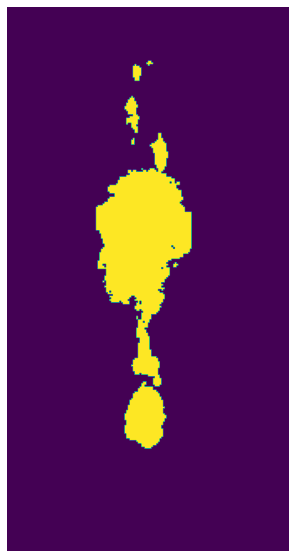

In [24]:
mip_imshow(binary_mask, 0, cmap = 'viridis', type ='mask')

In [25]:
direction = model.pet_direction
origin = model.pet_origin
spacing = model.pet_spacing
labelled_img = sitk.GetImageFromArray(binary_mask.transpose())
labelled_img.SetDirection(direction)
labelled_img.SetOrigin(origin)
labelled_img.SetSpacing(spacing)

In [26]:
labelled_img.GetSize()

(168, 168, 324)

In [27]:
model.pet_img.GetSize()

(168, 168, 324)

In [28]:
labelled_seuil = sitk.ConnectedComponent(labelled_img)
stats = sitk.LabelIntensityStatisticsImageFilter()
stats.Execute(labelled_seuil, sitk.ReadImage(pet_path))

In [29]:
stats.GetNumberOfLabels()

53

In [30]:
volume_voxel = model.pet_spacing[0] * model.pet_spacing[1] * model.pet_spacing[2] * 10**(-3)
volume_voxel

0.04976383751886897

In [31]:
for i in range(1, stats.GetNumberOfLabels() + 1) : 
    print('label : {}, volume = {}'.format(i, stats.GetNumberOfPixels(i) * volume_voxel))

label : 1, volume = 270.8148037776849
label : 2, volume = 5.523785964594455
label : 3, volume = 9.15654610347189
label : 4, volume = 1.6422066381226759
label : 5, volume = 515.3045375078882
label : 6, volume = 3.9811070015095176
label : 7, volume = 0.9952767503773794
label : 8, volume = 0.09952767503773793
label : 9, volume = 0.34834686263208275
label : 10, volume = 0.04976383751886897
label : 11, volume = 1273.6058936204136
label : 12, volume = 2.5379557134623174
label : 13, volume = 1321.3791776385276
label : 14, volume = 0.19905535007547587
label : 15, volume = 0.9455129128585104
label : 16, volume = 0.04976383751886897
label : 17, volume = 0.04976383751886897
label : 18, volume = 0.5474022127075586
label : 19, volume = 0.6966937252641655
label : 20, volume = 0.09952767503773793
label : 21, volume = 0.04976383751886897
label : 22, volume = 0.09952767503773793
label : 23, volume = 15.227734280773904
label : 24, volume = 0.04976383751886897
label : 25, volume = 1.9905535007547588
labe

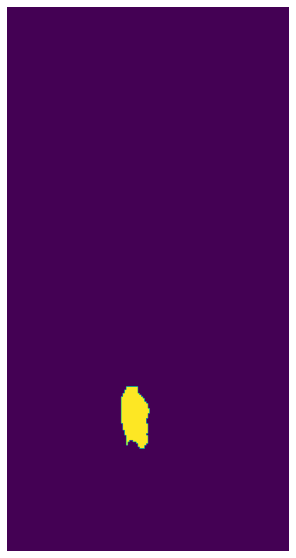

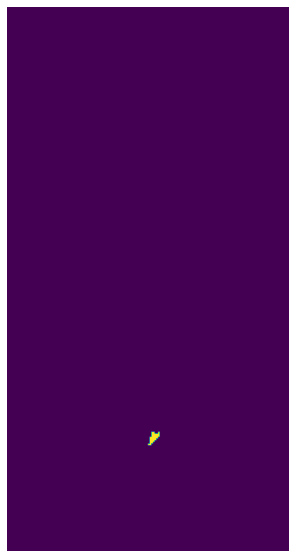

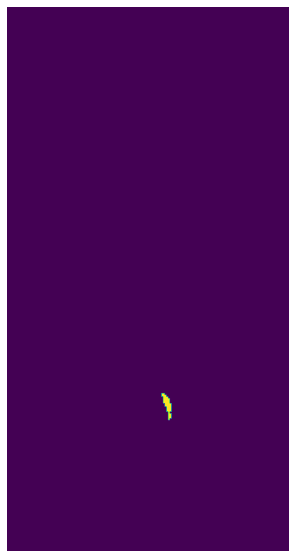

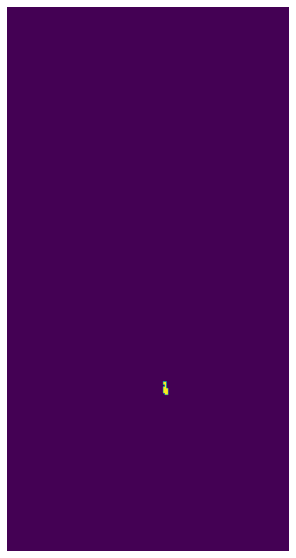

KeyboardInterrupt: 

In [32]:
for i in range(1,stats.GetNumberOfLabels() + 1): 
    new_mask = np.zeros((168, 168, 324))
    x,y,z = np.where(sitk.GetArrayFromImage(labelled_seuil).transpose() == i)

    for j in range(len(x)):
        new_mask[x[j], y[j], z[j]] = i

    mip_imshow(new_mask, 90, cmap = 'viridis', type = 'mask')

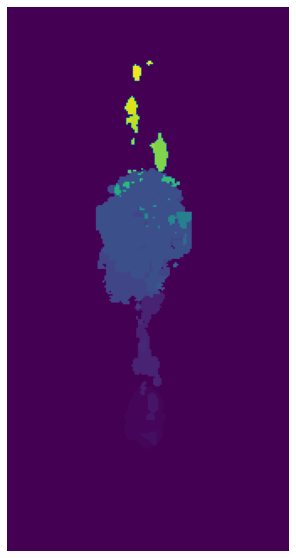

In [33]:
mip_imshow(sitk.GetArrayFromImage(labelled_seuil).transpose(), 0, cmap = 'viridis', type = 'mask')

In [34]:
numero_labels = []
for i in range(1, stats.GetNumberOfLabels() + 1) : 
    if stats.GetNumberOfPixels(i) * volume_voxel > float(30) :
        numero_labels.append(i)

In [35]:
numero_labels

[1, 5, 11, 13, 43]

In [36]:
labelled_seuil_array = sitk.GetArrayFromImage(labelled_seuil).transpose()

In [83]:
liste = []
for i in range(1,3) :
    liste.append(np.where(labelled_seuil_array == i))

In [85]:
liste[0]

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [87]:
test = np.zeros((168, 168, 324))
test[liste[0]] = 1

In [88]:
np.where(test == 1)

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [196]:
#LABEL 1

In [37]:
new_mask_3D_1 = np.zeros((168,168,324))
new_mask_3D_1[np.where(labelled_seuil_array == 1)] = model.pet_array[np.where(labelled_seuil_array == 1)]

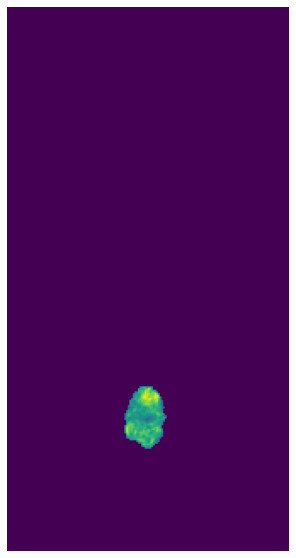

In [38]:
mip_imshow(new_mask_3D_1, 0, cmap = 'viridis', type = 'mask' )

In [39]:
D = ndimage.distance_transform_edt(new_mask_3D_1)
D.shape

(168, 168, 324)

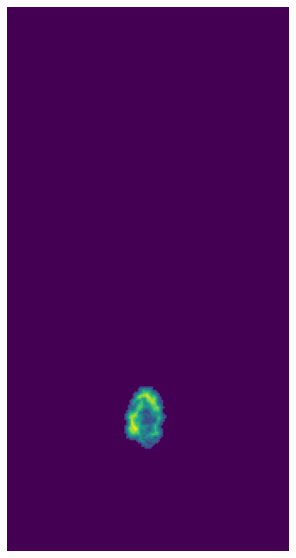

In [40]:
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

In [41]:
from skimage.feature import peak_local_max
localMax = peak_local_max(D, indices = True, min_distance=15)
localMax2 = peak_local_max(D, indices = False, min_distance=15)

In [42]:
localMax

array([[92, 76, 72],
       [94, 83, 92]])

In [43]:
marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1


0
1


In [45]:
import skimage as sk

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_1)

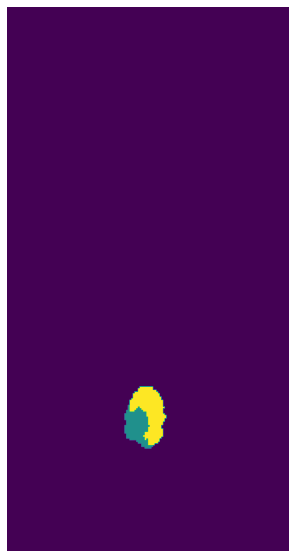

In [46]:
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

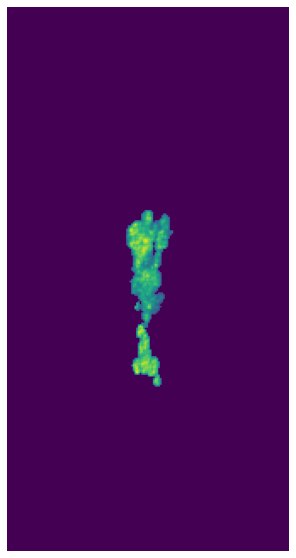

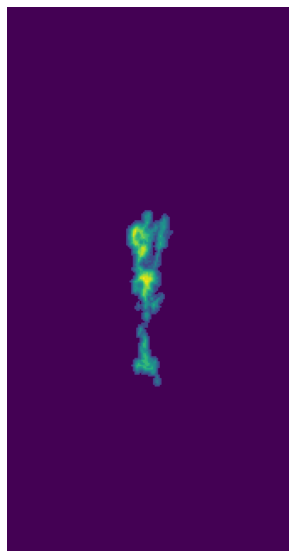

3


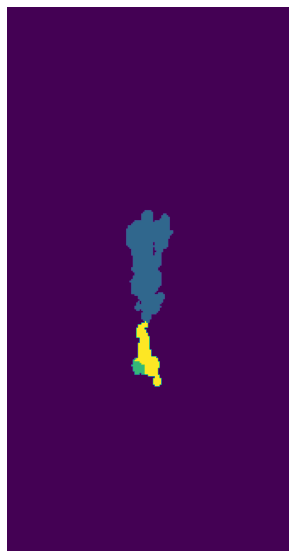

In [51]:
#LABEL 5 
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_seuil_array == 5)] = model.pet_array[np.where(labelled_seuil_array == 5)]
mip_imshow(new_mask_3D_5, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_5)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

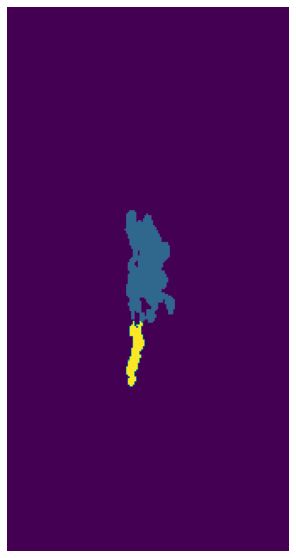

In [52]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

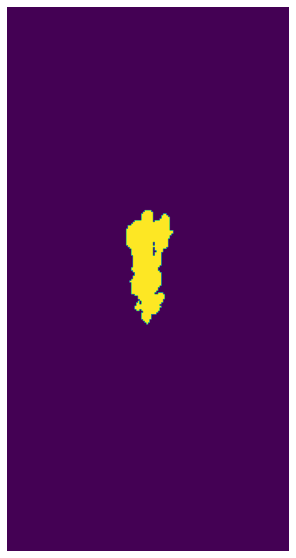

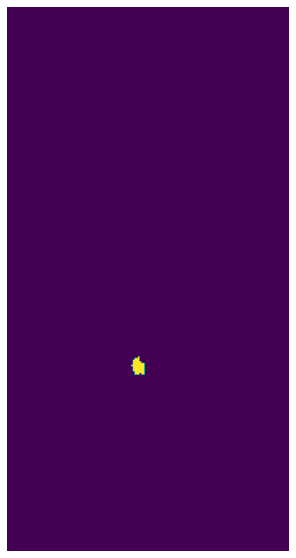

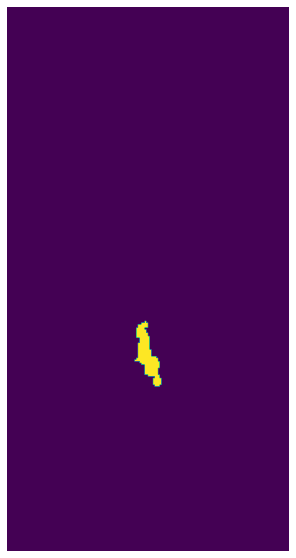

In [54]:
for label in range(1,4):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

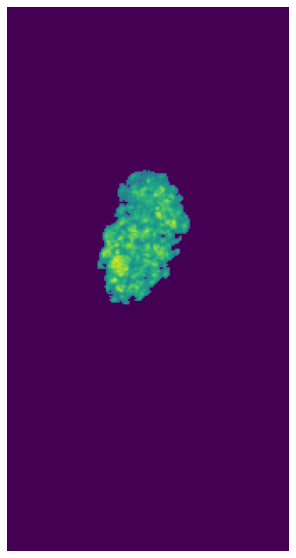

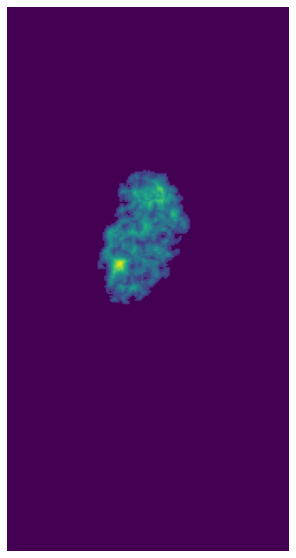

2


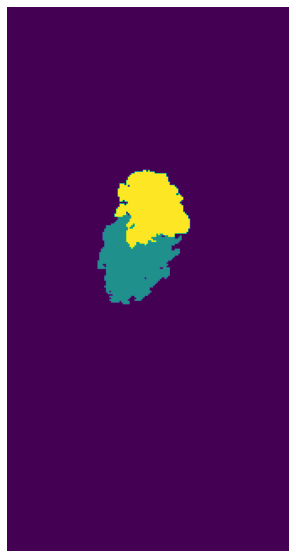

In [57]:
#label 11

new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_seuil_array == 11)] = model.pet_array[np.where(labelled_seuil_array == 11)]
mip_imshow(new_mask_3D_11, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_11)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

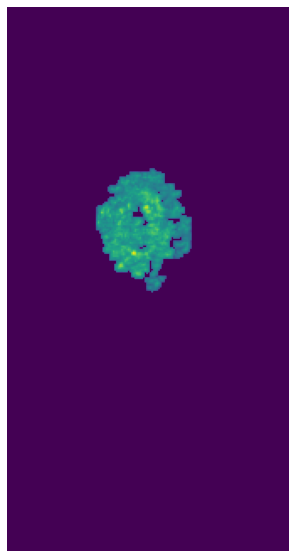

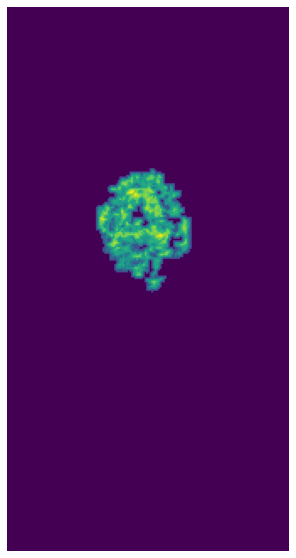

6


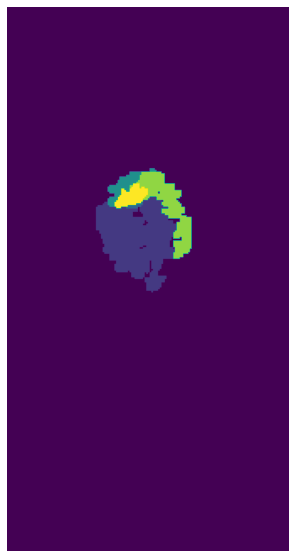

In [58]:
#label 13


new_mask_3D_13 = np.zeros((168,168,324))
new_mask_3D_13[np.where(labelled_seuil_array == 13)] = model.pet_array[np.where(labelled_seuil_array == 13)]
mip_imshow(new_mask_3D_13, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_13)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_13)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

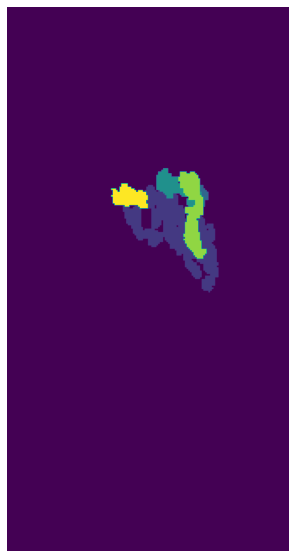

In [62]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

for label in range(1,7):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

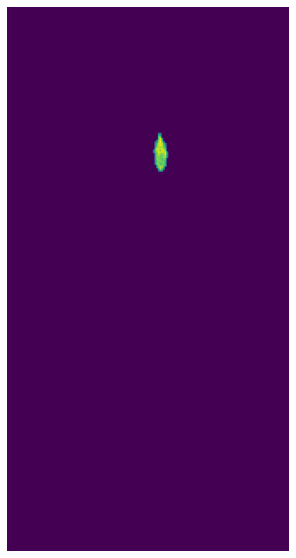

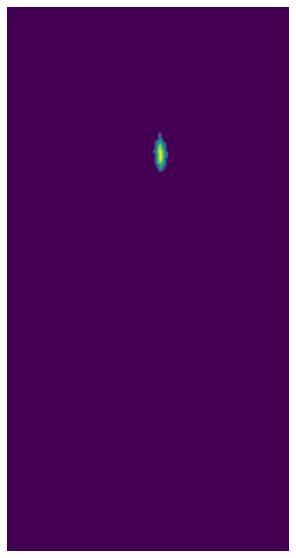

5


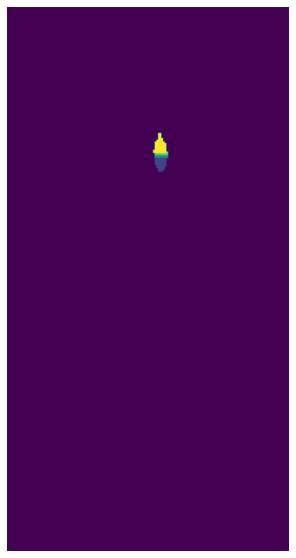

In [76]:
#LABEL 43

new_mask_3D_43 = np.zeros((168,168,324))
new_mask_3D_43[np.where(labelled_seuil_array == 43)] = model.pet_array[np.where(labelled_seuil_array == 43)]
mip_imshow(new_mask_3D_43, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_43)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_43)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')